In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates

In [46]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


Get a sense of the size and dimensions of the dataframe.

In [47]:
print(len(df))
print(len(df.columns))

1503
16


Looks at the DF types, for potential analyses.

In [48]:
print(df.dtypes)

2025_rank                         string[python]
2024_rank                         string[python]
institution_name                  string[python]
location                          string[python]
location_full                     string[python]
size                              string[python]
academic_reputation                      Float64
employer_reputation                      Float64
faculty_student                          Float64
citations_per_faculty                    Float64
international_faculty                    Float64
international_students                   Float64
international_research_network           Float64
employment_outcomes                      Float64
sustainability                           Float64
qs_overall_score                  string[python]
dtype: object


Descriptive statistics for dataset.

In [49]:
df.describe()

,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability
count,1503.0,1503.0,1503.0,1503.0,1403.0,1445.0,1502.0,1503.0,1484.0
mean,20.28656,19.786693,28.128676,23.50346,30.725374,25.580346,50.129095,23.825083,24.309299
std,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718
min,1.3,1.1,1.0,1.0,1.0,1.0,1.0,1.2,1.0
25%,6.3,4.3,7.3,2.8,4.2,2.9,22.725,4.0,1.3
50%,11.0,9.4,16.0,9.9,12.5,9.6,51.1,11.8,6.75
75%,23.5,25.3,40.4,36.4,51.6,38.3,77.1,33.4,39.5
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


We can first determine the distribution of top ranked global universities.

In [50]:
#filter df for top 100 ranked universities
top_100 = df.sort_values(by='2025_rank', ascending=False)
top_100 = df[0:100]

/tmp/ipykernel_653/211135405.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_100, y='location_full', order=top_100.location_full.value_counts().index, palette=palette);


Text(0, 0.5, 'Number of Top Ranked Universities')

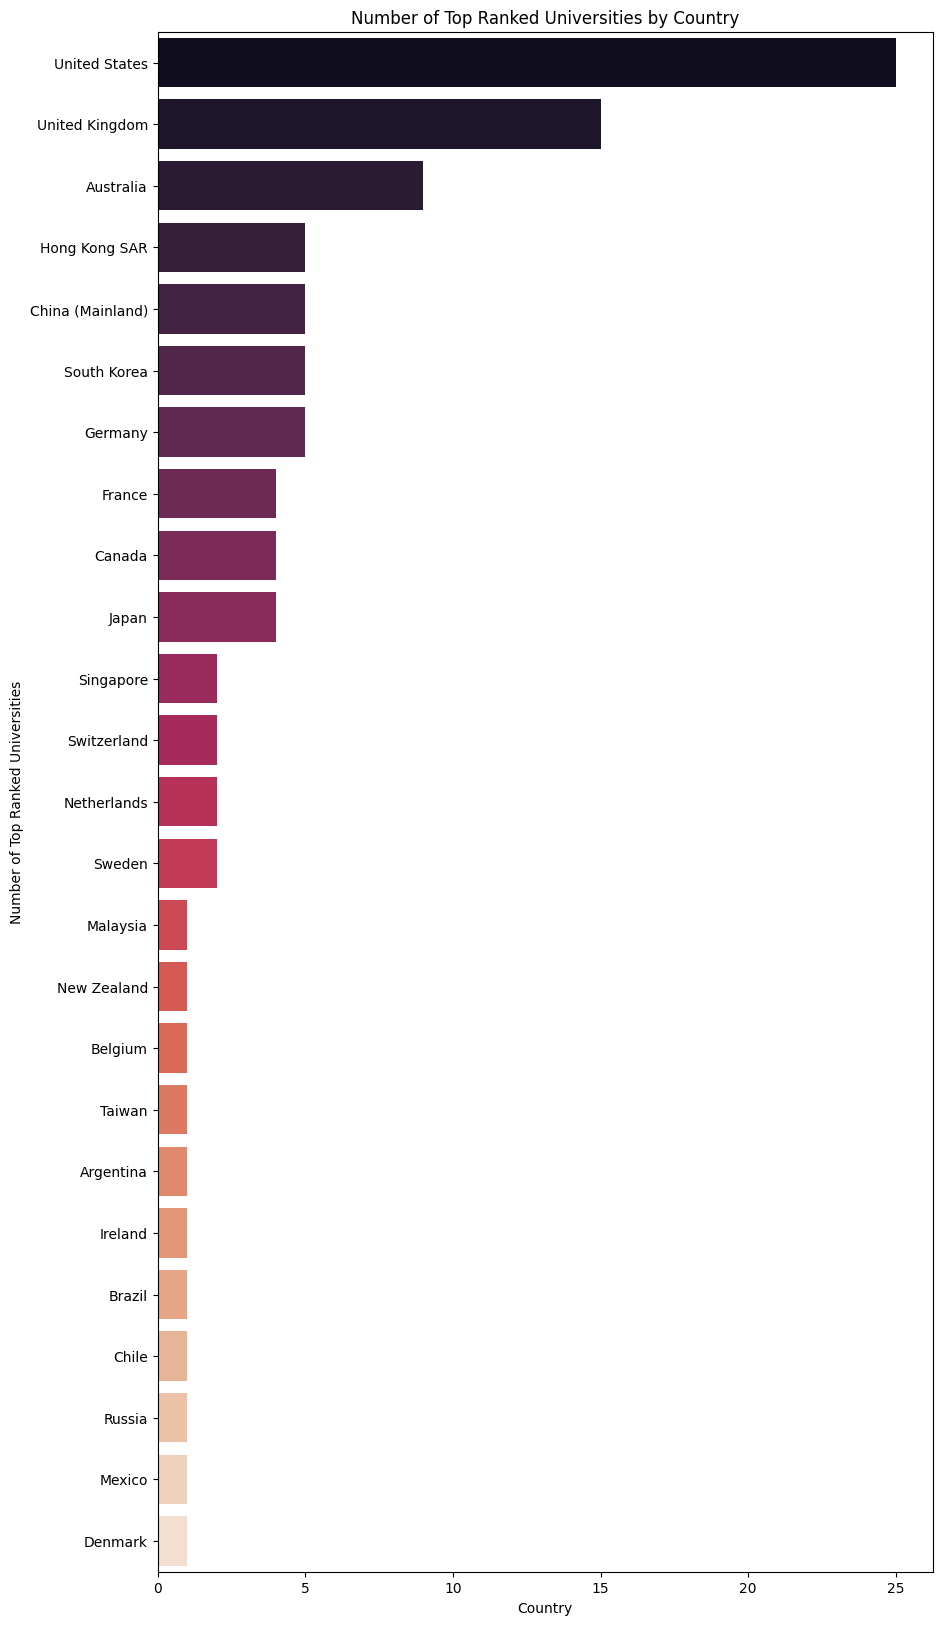

In [51]:
#fix size so labels are readable
fig, ax = plt.subplots(figsize=(10,20))

#color palette
palette = sns.color_palette("rocket", 25)

#plot a count of universities from each country
sns.countplot(data=top_100, y='location_full', order=top_100.location_full.value_counts().index, palette=palette);

#title and axis labels
plt.title("Number of Top Ranked Universities by Country")
plt.xlabel("Country")
plt.ylabel("Number of Top Ranked Universities")

We can create a correlation matrix of the variables of interest to determine if there may be some types of colleges that check a lot of boxes at once. 

In [52]:
#define columns of interest
cols = ['academic_reputation','employer_reputation','faculty_student','citations_per_faculty','international_faculty','international_students','international_research_network','employment_outcomes','sustainability','qs_overall_score']
df_corr = df[cols]
df_corr_copy = df_corr

#remove nas and convert to float to create corr matrix
for col in cols:
    df_corr[col] = pd.to_numeric(df[col].replace('-', np.nan), errors='coerce')
df_corr_num = df_corr.dropna()

/tmp/ipykernel_653/4171920185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[col] = pd.to_numeric(df[col].replace('-', np.nan), errors='coerce')
/tmp/ipykernel_653/4171920185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[col] = pd.to_numeric(df[col].replace('-', np.nan), errors='coerce')
/tmp/ipykernel_653/4171920185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

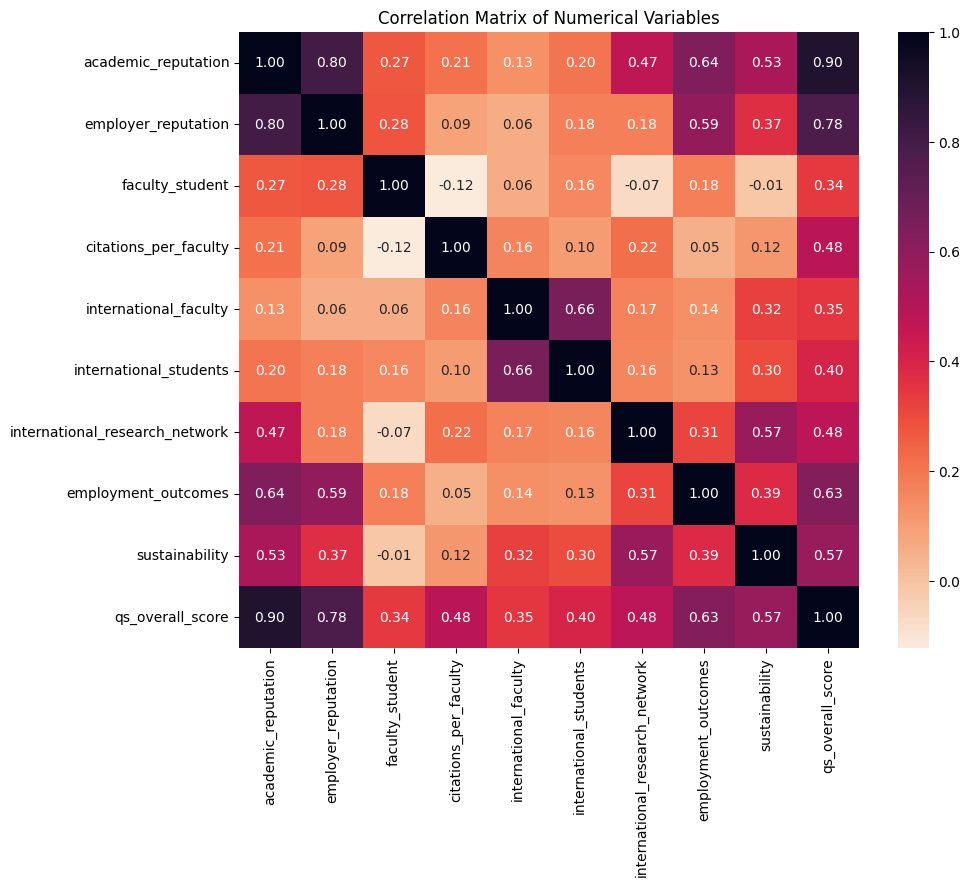

In [53]:
#new df for corrs
df_no_nas = df_corr_num[cols].corr()

#plot corr matrix
#update color palette to be reverse rocket for more color range
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_nas, cmap='rocket_r', annot=True, fmt=".2f") 

#title
plt.title("Correlation Matrix of Numerical Variables")

A few things that I find interesting from this are - 
1. international research network does not correlate strongly with international faculty and students
2. sustainability seems to be strongly correlated with a lot of variables, but particularly academic repuation and international research network. 
3. Faculty student ration is negatively correlated with international research networks and citations per faculty.

Based on this we can explore what variables might be correlated with career outcomes. To do so I will produce LRMs.
-employer rep x qs overall - yes 
-employer rep x employment outcomes - yes
-employer rep x academic rep - yes 
-employment outcomes x qs overall - yes
-employment outcomes x academic reputation - yes

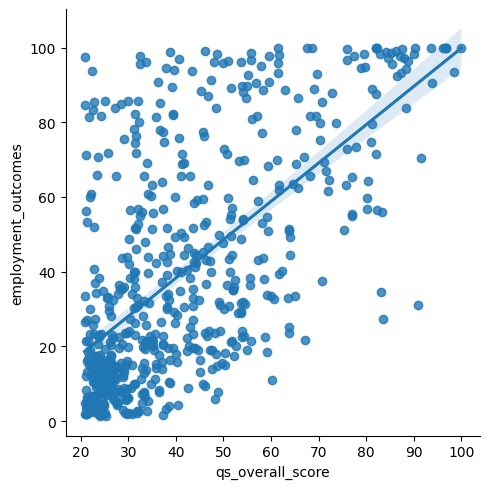

In [54]:
sns.lmplot(data=df_corr_num, x="qs_overall_score", y="employment_outcomes")

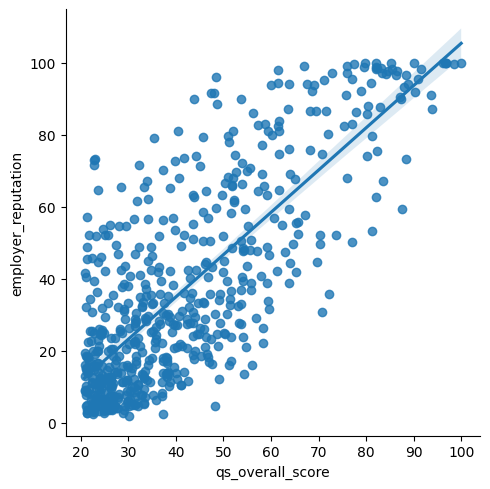

In [55]:
sns.lmplot(data=df_corr_num, x="qs_overall_score", y="employer_reputation")

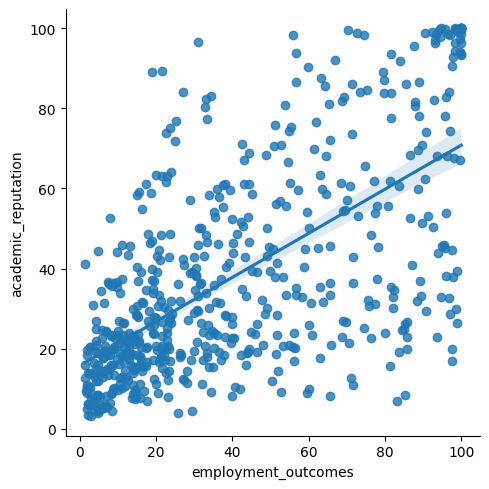

In [56]:
sns.lmplot(data=df_corr_num, x="employment_outcomes", y="academic_reputation")

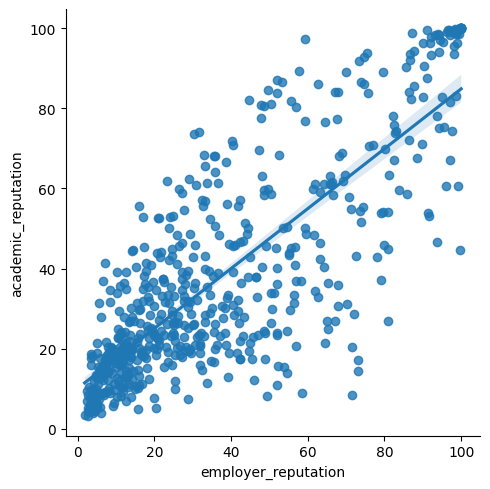

In [57]:
sns.lmplot(data=df_corr_num, x="employer_reputation", y="academic_reputation")

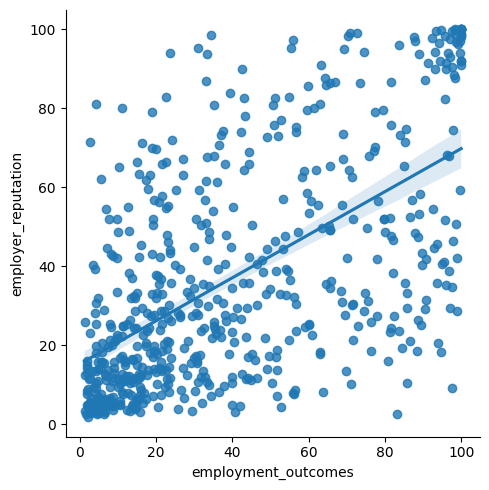

In [58]:
sns.lmplot(data=df_corr_num, x="employment_outcomes", y="employer_reputation")

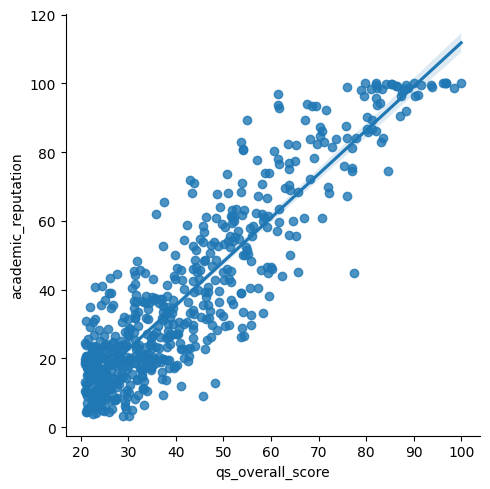

In [59]:
sns.lmplot(data=df_corr_num, x="qs_overall_score", y="academic_reputation")

Lets say this person is similar to me in that they would like to select a school that offers lots of research opportunities, faculty relationships, and a diverse student faculty population. However, their parents are more concerned with their long term career prospects after college.  

Some potential questions one could ask with these priorities are: 
What characteristics of a university produce stronger career outcomes? 
How does size influence access to research opportunities, faculty relationships, and a diverse student faculty population?


In [60]:
#Potential questions about the data: 
#- Does the country you go to college in influence your career prospects?
    #Bar chart separated by country
#- Are colleges in certain countries or regions have more international populations? Is this different for students vs. faculty? 
    #Bubble map?
#- what university characteristic most correlates with employment outcomes?
    #Chord diagram
    #Heat map

We can look at how size affects the variables of choice for this student with a parallel plot.

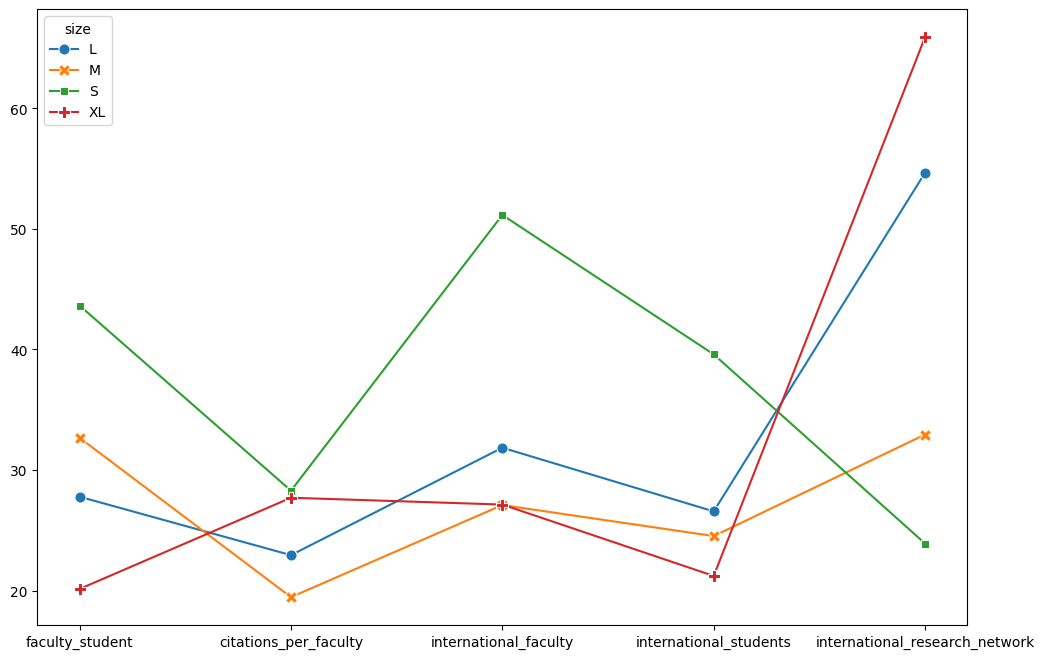

In [61]:
average_data = df.groupby('size')[['faculty_student', 'citations_per_faculty', 'international_faculty', 'international_students', 'international_research_network']].mean()
#normalized_data = (average_data - average_data.mean()) / average_data.std()

plt.figure(figsize=(12,8))
parallel_plot = sns.lineplot(data=average_data.transpose(),
                             dashes=False,
                             markers=True,
                             markersize=8)


EDITS:
-title
-axis labels

EDITS: 
-fix the sorting for this graph
-title
coloring
axes

Based on this visualization, we can see that small schools rank higher on the variables of interest for research interests, for faculty student relationships, and for internationality of school - except for in terms of an international research network. 

However, based on the other variables, I would recommend for this student that they choose to narrow their search to primarily small schools. 

In [62]:
# small colleges dataframe
small = ['S']
small_colleges_df = df[df['size'].isin(small)]

We can take this subset of colleges and determine what countries are best to look in for an international student and faculty population. 

In [63]:
#What countries have the most international student attendance?
#create new df with relevant variables
df_international = pd.DataFrame()
columns_intl = ['location', 'institution_name', 'international_faculty', 'international_students', 'international_research_network']
df_international[columns_intl] = df[columns_intl]

#filter for small colleges
small = ['S']
small_colleges_df_intl = df_international[df['size'].isin(small)]

#group by location and average each variable
#grouped_by_location_intl = small_colleges_df_intl.groupby('location').mean()

In [64]:
#Does the country you go to college in influnence your career prospects?
#create new df with relevant variables
df_career = pd.DataFrame()
columns_career = ['location', 'employer_reputation', 'citations_per_faculty', 'international_research_network', 'employment_outcomes']
df_career[columns_career] = df[columns_career]

#group by location and average each variable
grouped_by_location = df_career.groupby('location').mean()

In [65]:
#sort each variable in descending order
reputation = grouped_by_location.sort_values(by='employer_reputation', ascending=False)
citations = grouped_by_location.sort_values(by='citations_per_faculty', ascending=False)
research_network = grouped_by_location.sort_values(by='international_research_network', ascending=False)
employment_outcomes = grouped_by_location.sort_values(by='employment_outcomes', ascending=False)

We can first look at how country influences career outcomes outside of academia by looking at career outcomes and employer reputations.

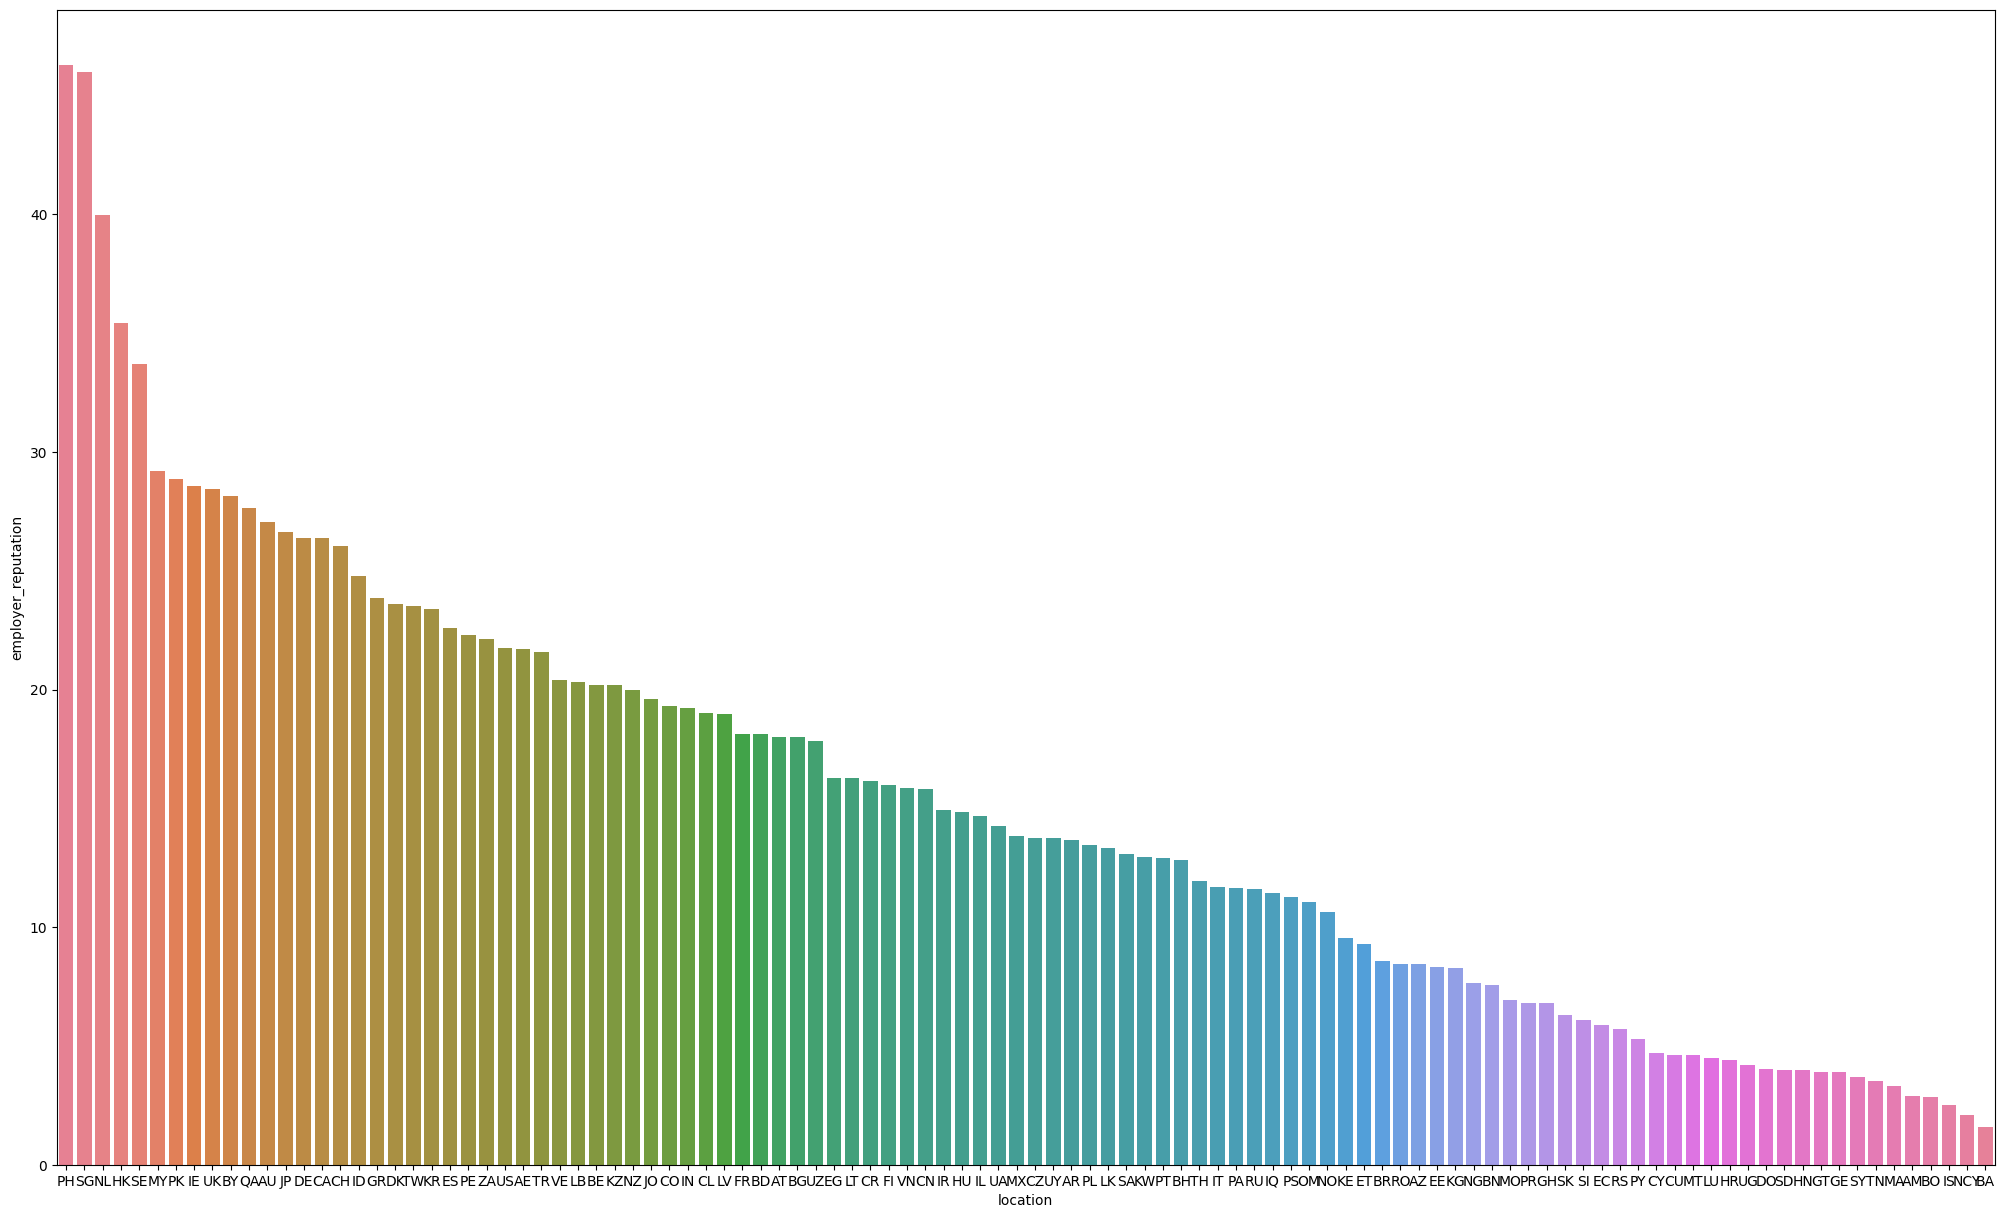

In [66]:
# plot employer reputation bar chart
#fix size so labels are readable
fig, ax = plt.subplots(figsize=(25,15))

sns.barplot(
    x="location", 
    y="employer_reputation", 
    data=reputation, 
    estimator=sum, 
    errorbar=None, 
    hue='location');

<Axes: xlabel='location', ylabel='employer_reputation'>

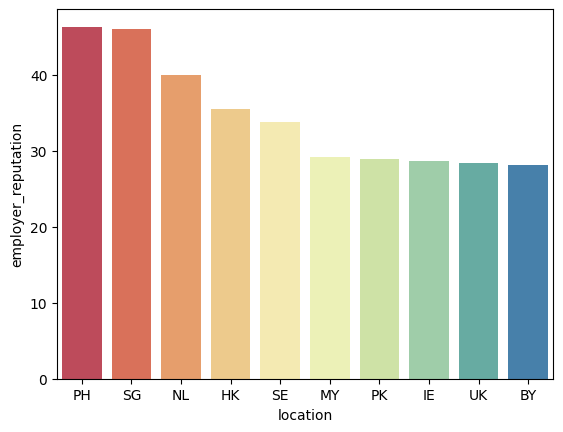

In [67]:
top_10_reputations = reputation.head(10)

#update the palette to a non sequential theme
palette = sns.color_palette("Spectral", 10)

sns.barplot(
    x="location", 
    y="employer_reputation", 
    data=top_10_reputations, 
    estimator=sum, 
    errorbar=None, 
    hue='location',
    palette=palette
)

TR, PK, MY, KR, FR

<Axes: xlabel='location', ylabel='employment_outcomes'>

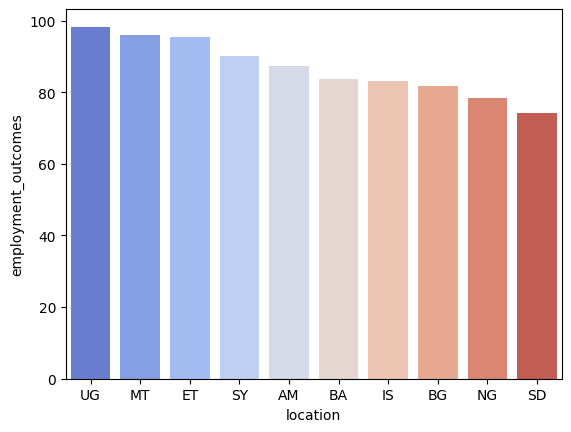

In [68]:
top_10_employment = employment_outcomes.head(10)

#update the palette to a non sequential theme
palette = sns.color_palette("coolwarm", 10)

# plot employment_outcomes bar chart
sns.barplot(
    x="location", 
    y="employment_outcomes", 
    data=top_10_employment, 
    estimator=sum, 
    errorbar=None, 
    hue='location',
    palette=palette)

If the student is more interested in going into research or academic work, I will do different visualizations to determine what schools might be best based on variables for the number of citations each faculty has, or how many international networking connections schools in this country generally offer. 

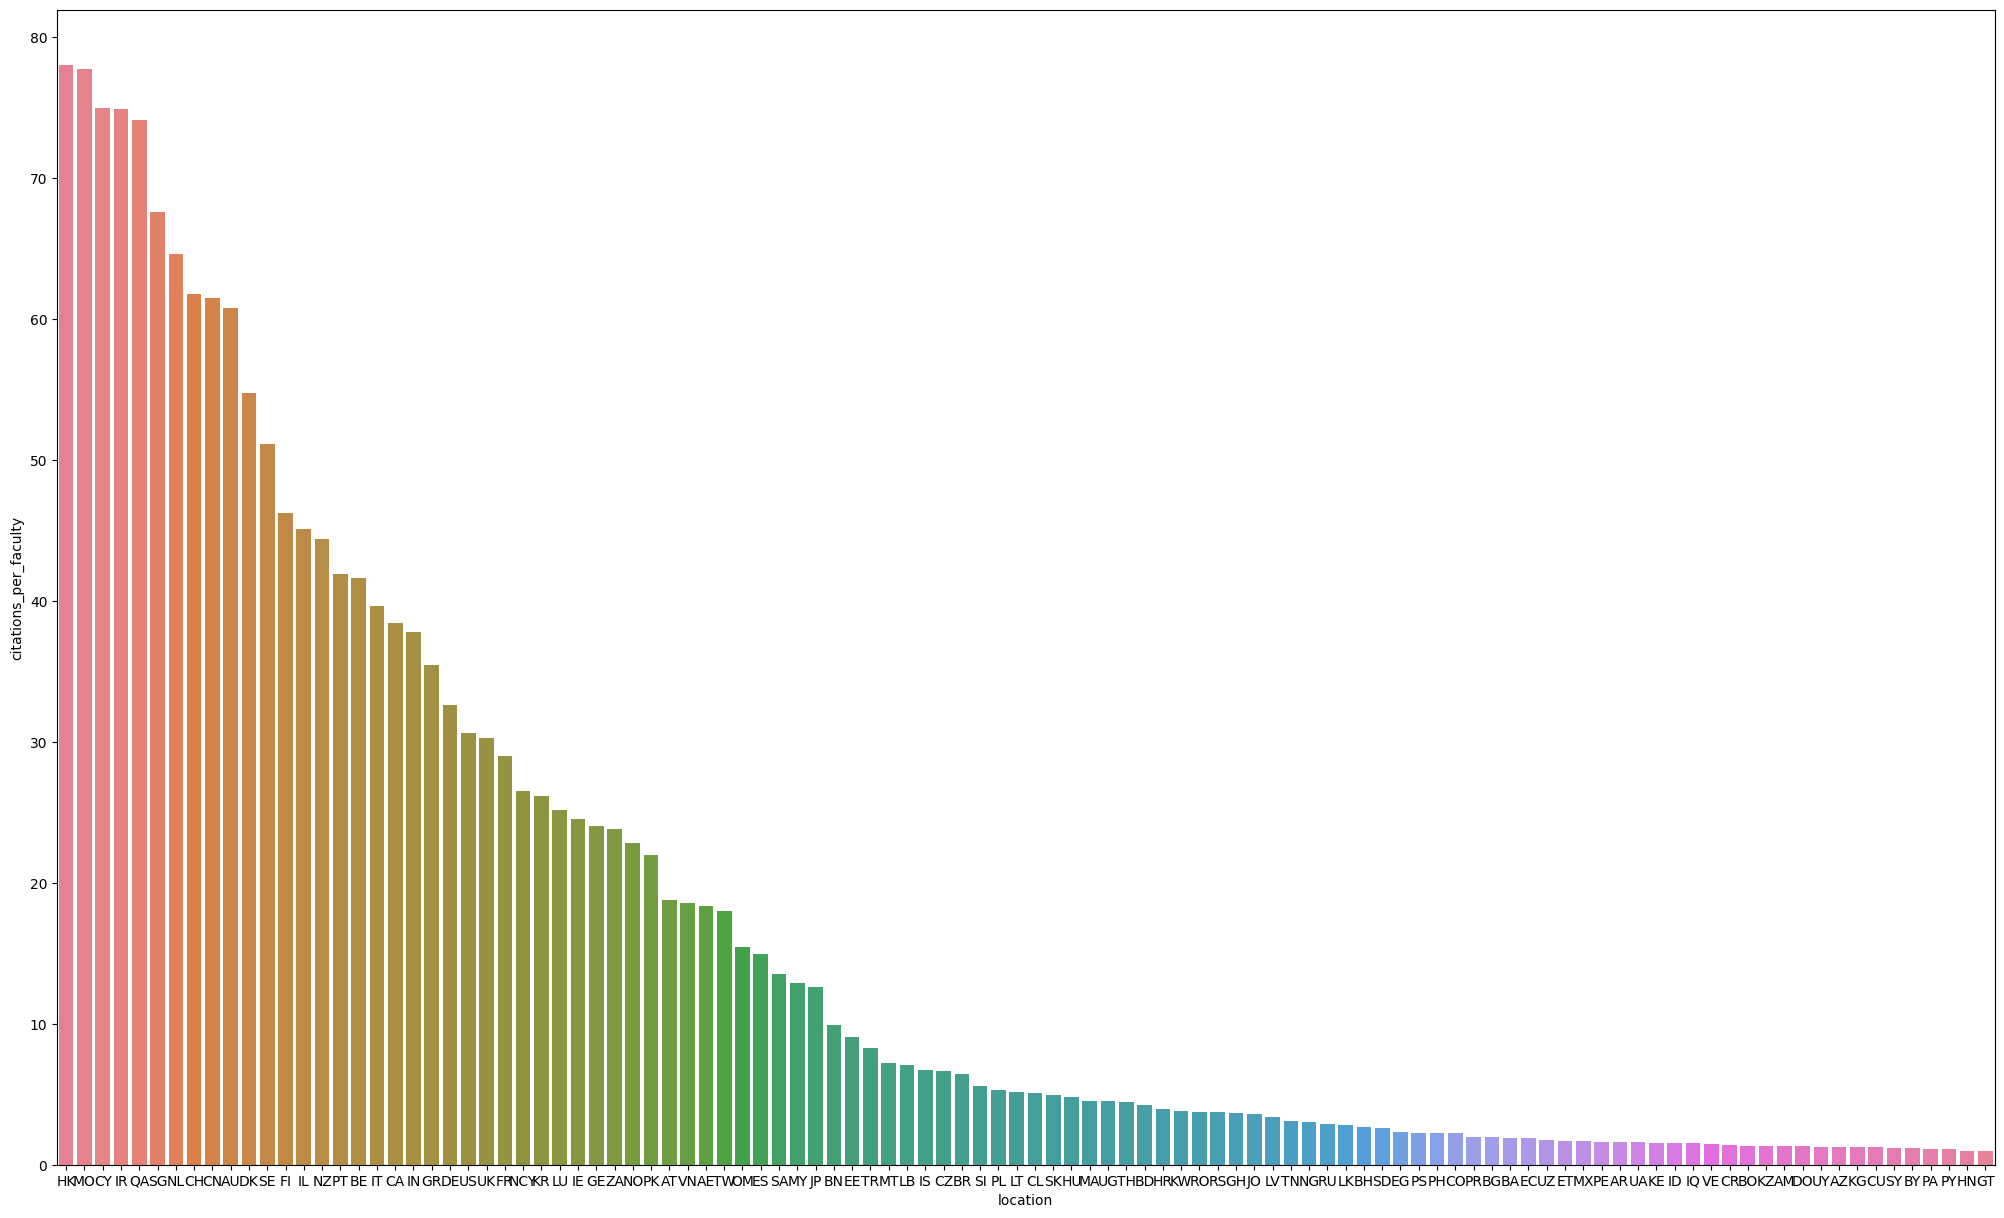

In [69]:
# plot citations_per_faculty bar chart

#fix size so labels are readable
fig, ax = plt.subplots(figsize=(25,15))

sns.barplot(
    x="location", 
    y="citations_per_faculty", 
    data=citations, 
    estimator=sum, 
    errorbar=None, 
    hue='location');

<Axes: xlabel='location', ylabel='citations_per_faculty'>

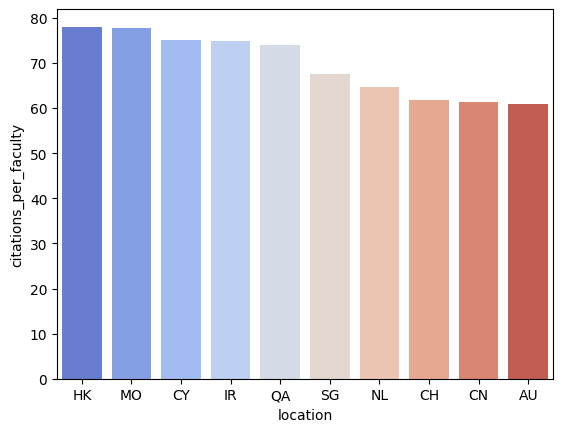

In [70]:
top_10_citations = citations.head(10)

#update the palette to a non sequential theme
palette = sns.color_palette("coolwarm", 10)

sns.barplot(
    x="location", 
    y="citations_per_faculty", 
    data=top_10_citations, 
    estimator=sum, 
    errorbar=None, 
    hue='location',
    palette=palette
)

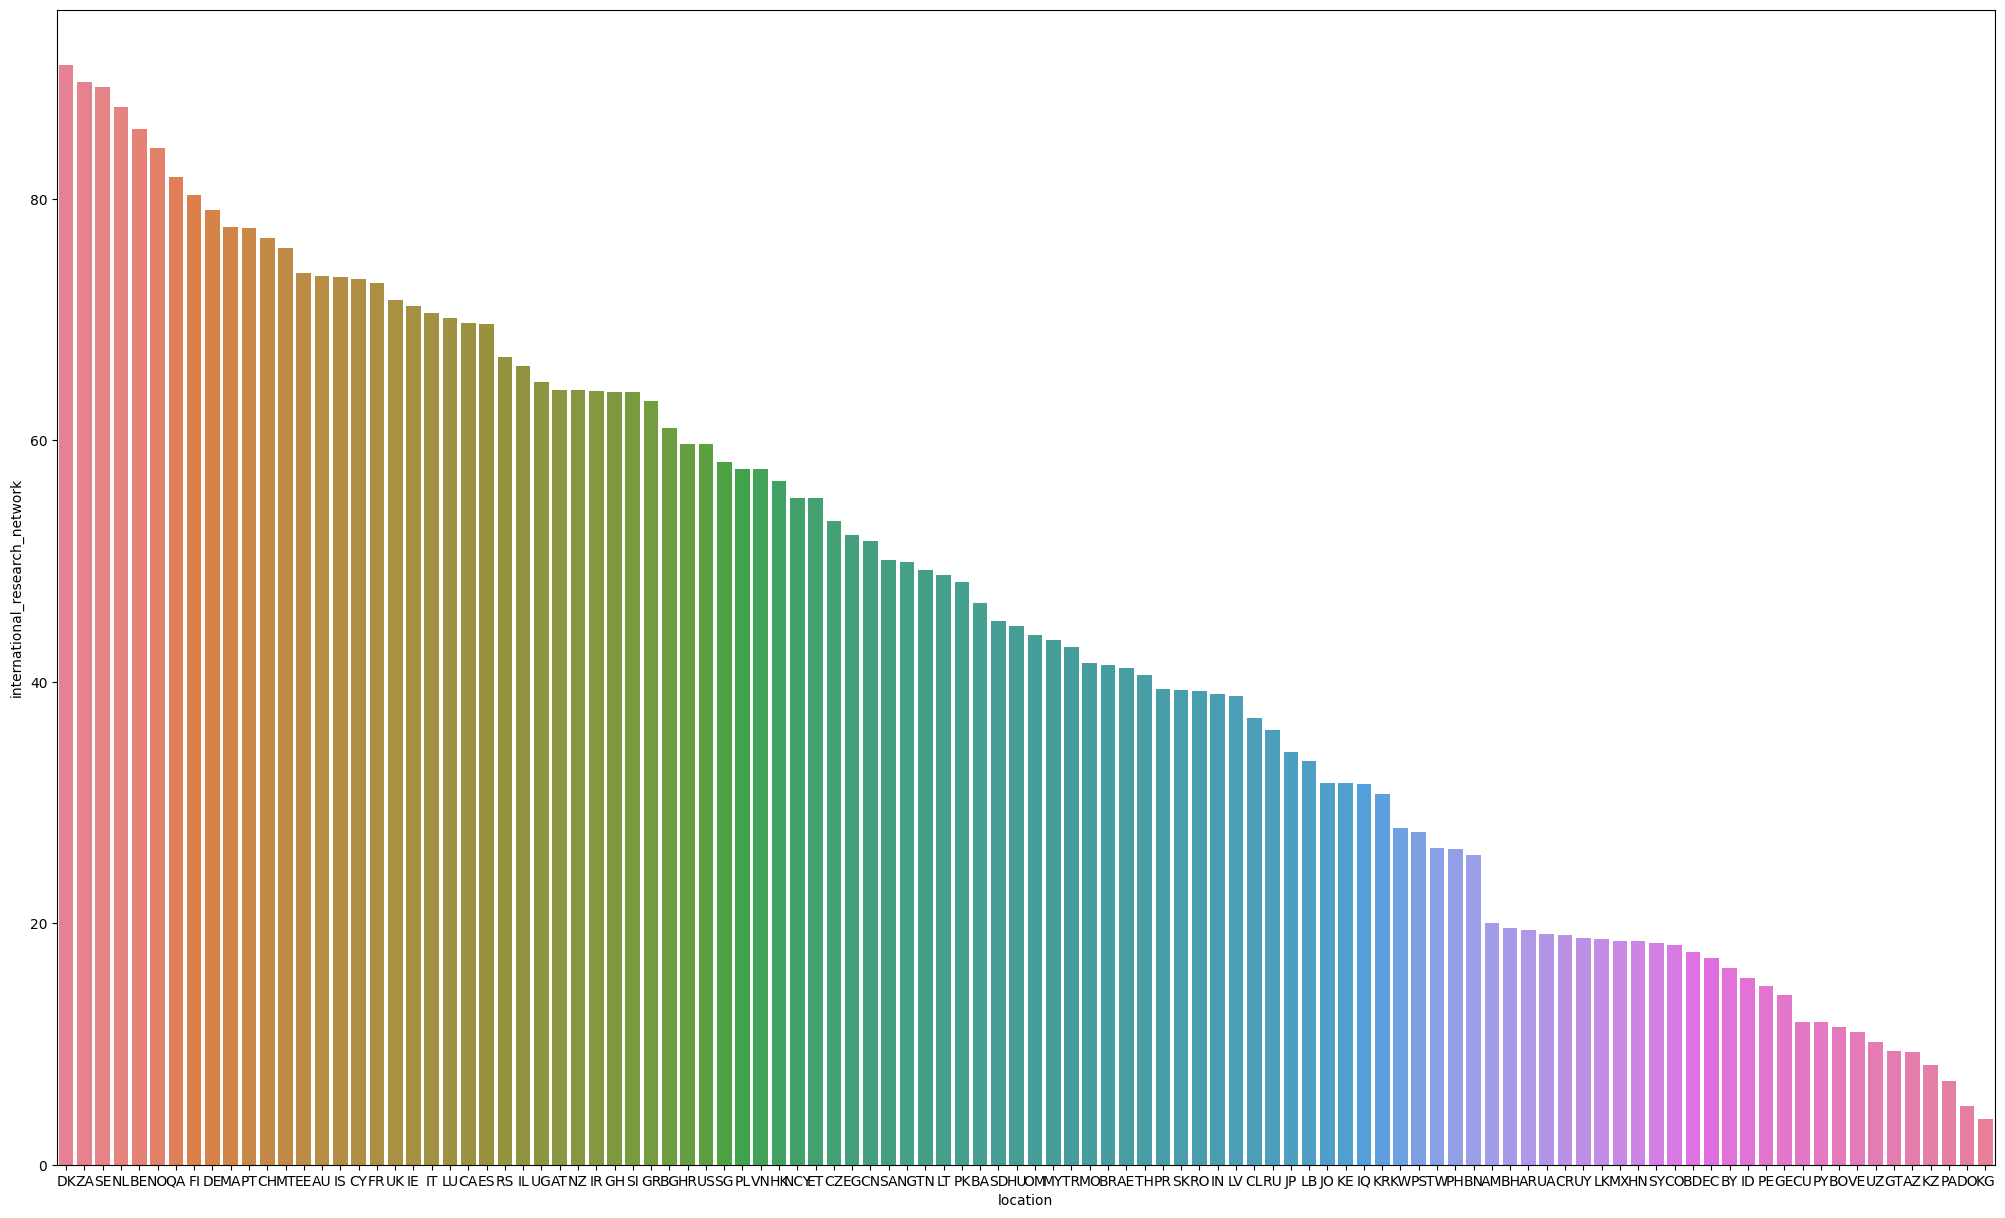

In [71]:
# plot international_research_network bar chart
#fix size so labels are readable
fig, ax = plt.subplots(figsize=(25,15))

sns.barplot(
    x="location", 
    y="international_research_network", 
    data=research_network, 
    estimator=sum, 
    errorbar=None, 
    hue='location');

Create a linear reg plot

In [72]:
#sns.regplot(data=df, x="", y="")
#sns.lmplot(data=df, x="", y="")

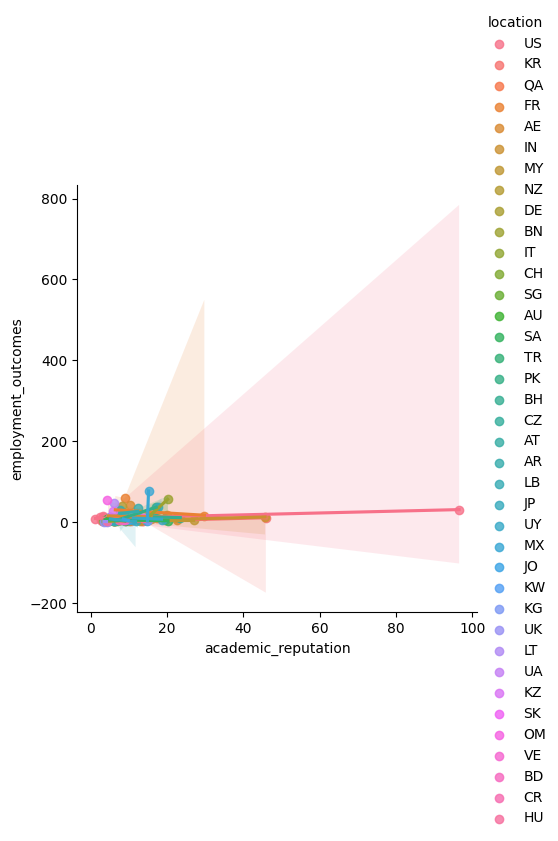

In [73]:
sns.lmplot(data=small_colleges_df,
           x="academic_reputation",
           y="employment_outcomes",
           hue="location")

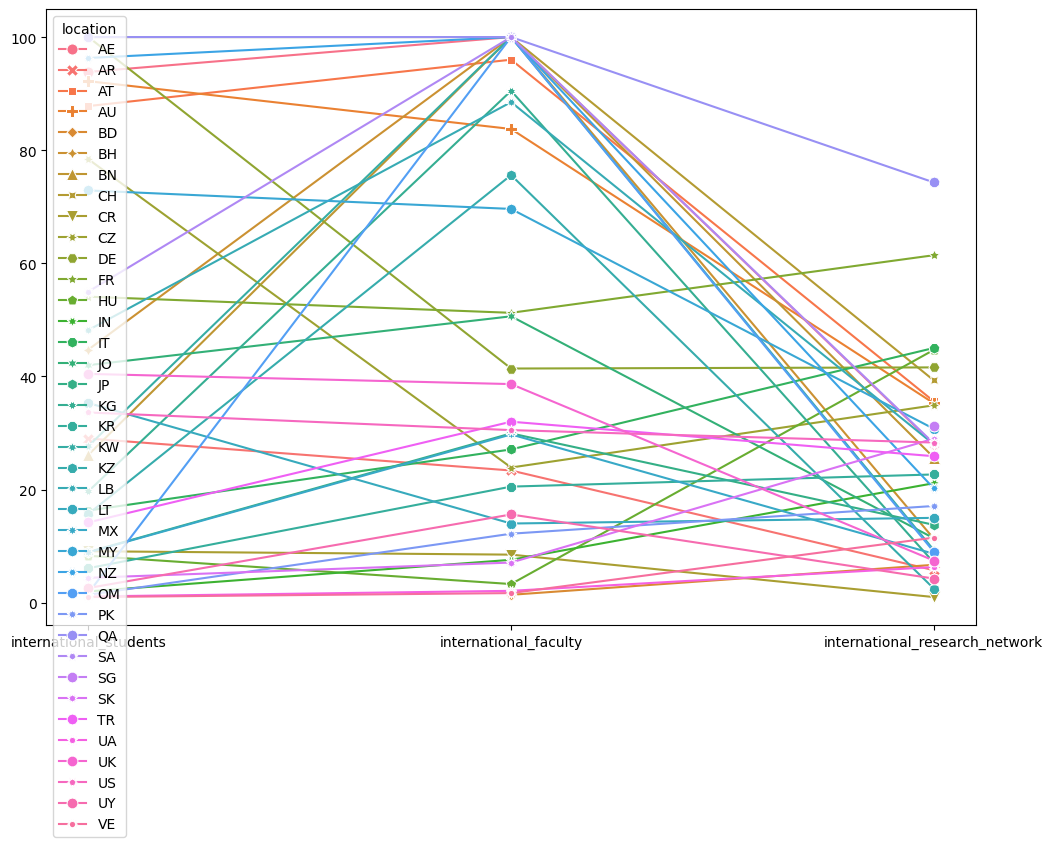

In [74]:
average_data = small_colleges_df_intl.groupby('location')[['international_students', 'international_faculty', 'international_research_network']].mean()
#normalized_data = (average_data - average_data.mean()) / average_data.std()

plt.figure(figsize=(12,8))
parallel_plot = sns.lineplot(data=average_data.transpose(),
                             dashes=False,
                             markers=True,
                             markersize=8)